<a href="https://colab.research.google.com/github/penkovgd/itmo-dl-course/blob/main/lab3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этой лабораторной работе вы будете использовать рекуррентные нейронные сети.

In [ ]:
%pip install -q opendatasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import opendatasets as od

https://www.kaggle.com/datasets/shayanfazeli/heartbeat - набор данных ЭКГ. Используйте мультиклассовый датасет.
https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data - отзывы клиентов Амазона. В качестве лейблов используйте оценки клиентов.

Для начала - задача классификации ЭКГ. Импортируйте датасет, подготовьте выборку, постройте и обучите модель, протестируйте её и в виде гистограмм проиллюстрируйте, в каких классах чаще ошибается нейронная сеть. Также для каждого класса постройте отдельную гистограмму, содержащую ложно классифицированные данные по разным классам.

## ЭКГ

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/shayanfazeli/heartbeat'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: georgus
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat


100%|██████████| 98.8M/98.8M [00:00<00:00, 836MB/s]

In [ ]:
train_df = pd.read_csv('/content/heartbeat/mitbih_train.csv')
test_df = pd.read_csv('/content/heartbeat/mitbih_test.csv')
print(train_df.shape)
print(test_df.shape)

(87553, 188)
(21891, 188)


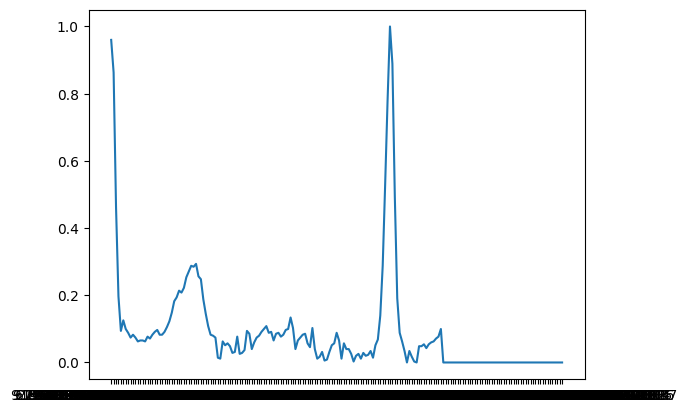

In [ ]:
# Посмотрим на данные
plt.plot(train_df.iloc[0, :-1])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_samples, val_samples = train_test_split(train_df, test_size=0.3, shuffle=True)
print(train_samples.shape)
print(val_samples.shape)

(61287, 188)
(26266, 188)


In [ ]:
X_train = train_samples.iloc[:, :-1].values
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = train_samples.iloc[:, -1].values

X_val = val_samples.iloc[:, :-1].values
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
y_val = val_samples.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test = test_df.iloc[:, -1].values

print(f'X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'X val shape: {X_val.shape}, y val shape: {y_val.shape}')
print(f'X test shape: {X_test.shape}, y test shape: {y_test.shape}')

X train shape: (61287, 187, 1), y train shape: (61287,)
X val shape: (26266, 187, 1), y val shape: (26266,)
X test shape: (21891, 187, 1), y test shape: (21891,)


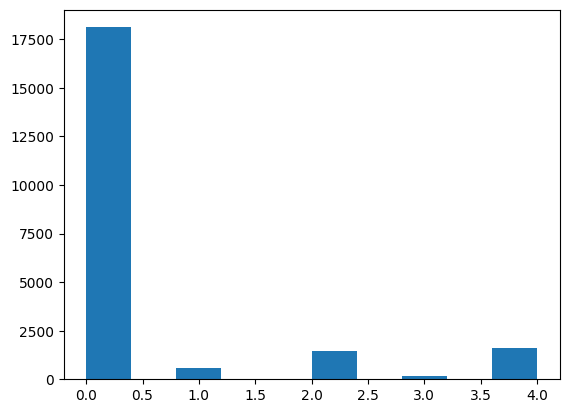

In [ ]:
plt.hist(y_test) # проверка на дисбаланс классов
plt.show()

In [ ]:
base_acc = len(y_test[y_test == 0]) / len(y_test) # базовая accuracy, которую наша модель должна превзойти
base_acc

0.8276003837193368

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.LSTM(32),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])
callbacks = [keras.callbacks.ModelCheckpoint('heartbeat_lstm.keras', monitor='val_loss', save_best_only=True)]
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, callbacks=callbacks, validation_data=(X_val, y_val))


Epoch 1/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8294 - loss: 0.7536 - val_accuracy: 0.8244 - val_loss: 0.6537
Epoch 2/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8261 - loss: 0.6664 - val_accuracy: 0.8244 - val_loss: 0.6437
Epoch 3/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 54s 20ms/step - accuracy: 0.8298 - loss: 0.6493 - val_accuracy: 0.8244 - val_loss: 0.6560
Epoch 4/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8298 - loss: 0.6504 - val_accuracy: 0.8244 - val_loss: 0.6498
Epoch 5/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8253 - loss: 0.6495 - val_accuracy: 0.8245 - val_loss: 0.6542
Epoch 6/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8283 - loss: 0.5882 - val_accuracy: 0.8302 - val_loss: 0.5476
Epoch 7/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8276 - loss: 0.5725 - val_accuracy: 0.8244 - val_loss: 0.5457
Epoch 8/10
1916/1916 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8259 -

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,897 (58.20 KB)

 Trainable params: 4,965 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,932 (38.80 KB)

In [ ]:
model_best = keras.models.load_model('heartbeat_lstm.keras')
test_loss, test_acc = model_best.evaluate(X_test, y_test)
(test_loss, test_acc)

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9703 - loss: 0.1697


(0.4536949396133423, 0.8723676204681396)

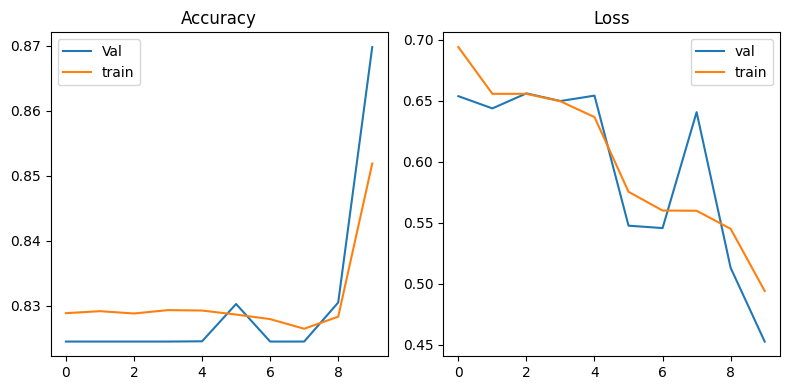

In [ ]:
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
train_loss = history.history['loss']
epochs = list(range(0, len(val_acc)))

fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].set_title('Accuracy')
axes[0].plot(epochs, val_acc, label='Val')
axes[0].plot(epochs, train_acc, label='train')
axes[0].legend()

axes[1].set_title('Loss')
axes[1].plot(epochs, val_loss, label='val')
axes[1].plot(epochs, train_loss, label='train')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
y_proba = model_best.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


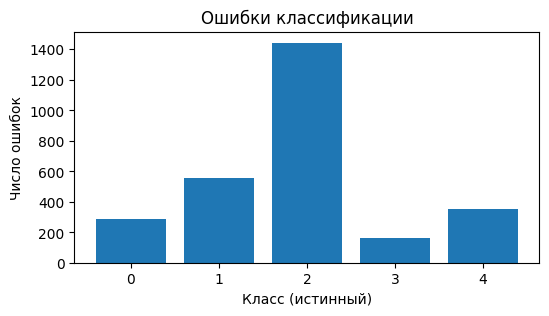

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = np.array(range(cm.shape[0]))
errors = np.array([cm[i].sum() - cm[i, i] for i in classes])

plt.figure(figsize=(6,3))
plt.bar(classes, errors)
plt.xticks(classes)
plt.xlabel('Класс (истинный)')
plt.ylabel('Число ошибок')
plt.title('Ошибки классификации')
plt.show()

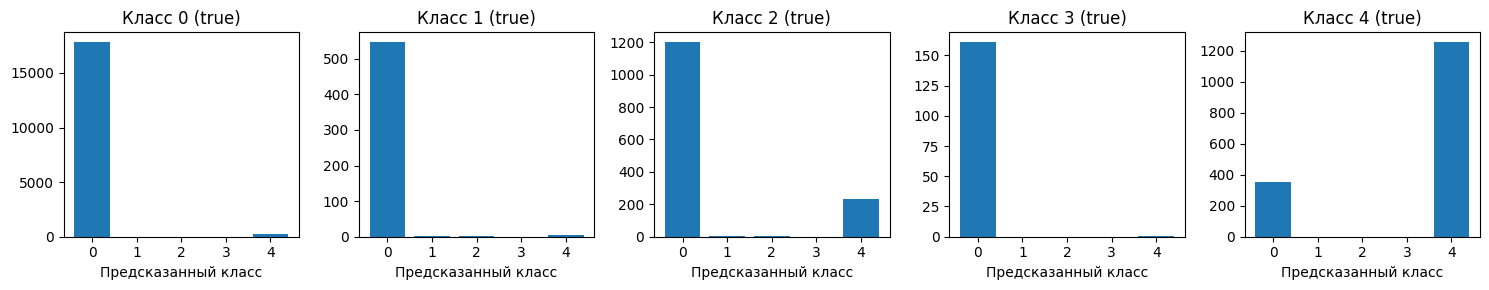

In [ ]:
n_classes = cm.shape[0]
class_labels = np.arange(n_classes)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    counts = cm[i]
    ax.bar(class_labels, counts)
    ax.set_title(f'Класс {i} (true)')
    ax.set_xlabel('Предсказанный класс')
    ax.set_xticks(class_labels)

plt.tight_layout()
plt.show()

## Амазон

В задаче обработки текста в качестве входных данных используйте отзывы клиентов, в качестве выходных - их оценки. Получите точность не ниже 90%. Текст необходимо подготовить. Также подготовьте второй датасет, но к нему примените лемматизацию (например, из nltk) текста. При прочих равных параметрах сравните результаты модели, обученной с помощью обычного словаря и с помощью лемматизированного.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: georgus
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products


100%|██████████| 16.3M/16.3M [00:00<00:00, 1.27GB/s]

In [ ]:
raw_df = pd.read_csv('/content/consumer-reviews-of-amazon-products/1429_1.csv')
raw_df.head()

<ipython-input-4-2862229405>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('/content/consumer-reviews-of-amazon-products/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
full_df = raw_df[['reviews.text', 'reviews.rating']]
full_df = full_df.dropna()
full_df['reviews.rating'] -= 1
full_df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,4.0
1,great for beginner or experienced person. Boug...,4.0
2,Inexpensive tablet for him to use and learn on...,4.0
3,I've had my Fire HD 8 two weeks now and I love...,3.0
4,I bought this for my grand daughter when she c...,4.0
...,...,...
34655,This is not appreciably faster than any other ...,2.0
34656,Amazon should include this charger with the Ki...,0.0
34657,Love my Kindle Fire but I am really disappoint...,0.0
34658,I was surprised to find it did not come with a...,0.0


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def clean_text_with_lemm(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

full_df['clean_text'] = full_df['reviews.text'].apply(clean_text)
full_df['clean_text_with_lemm'] = full_df['reviews.text'].apply(clean_text_with_lemm)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(full_df, test_size=0.4, random_state=0)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=0)

### Без лемматизации

In [ ]:
max_length = 50
max_tokens = 10_000

text_vectorization = layers.TextVectorization(
 max_tokens=max_tokens,
 output_mode="int",
 output_sequence_length=max_length,
)

text_vectorization.adapt(df_train['clean_text'])

X_train = text_vectorization(df_train['clean_text'])
X_val   = text_vectorization(df_val['clean_text'])
X_test  = text_vectorization(df_test['clean_text'])

y_train = df_train['reviews.rating'].values
y_val = df_val['reviews.rating'].values
y_test = df_test['reviews.rating'].values

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(max_length,)),
    layers.Embedding(input_dim=max_tokens, output_dim=64),
    layers.LSTM(64),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

callbacks = [keras.callbacks.ModelCheckpoint('amazon_lstm.keras', monitor='val_loss', save_best_only=True)]
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=callbacks, validation_data=(X_val, y_val))


Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6729 - loss: 0.9353 - val_accuracy: 0.6908 - val_loss: 0.8255
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6876 - loss: 0.8388 - val_accuracy: 0.7019 - val_loss: 0.7483
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7139 - loss: 0.7370 - val_accuracy: 0.7096 - val_loss: 0.7314
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7311 - loss: 0.6729 - val_accuracy: 0.7106 - val_loss: 0.7203
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7493 - loss: 0.6268 - val_accuracy: 0.6947 - val_loss: 0.7452
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7789 - loss: 0.5756 - val_accuracy: 0.6975 - val_loss: 0.7688
Epoch 7/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7916 - loss: 0.5410 - val_accuracy: 0.6851 - val_loss: 0.8483
Epoch 8/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8183 - loss: 0.4884 - val_accuracy: 0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,020,049 (7.71 MB)

 Trainable params: 673,349 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,700 (5.14 MB)

In [ ]:
model_best = keras.models.load_model('amazon_lstm.keras')
test_loss, test_acc = model_best.evaluate(X_test, y_test)
(test_loss, test_acc)

217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7111 - loss: 0.7201


(0.7211564183235168, 0.7139763236045837)

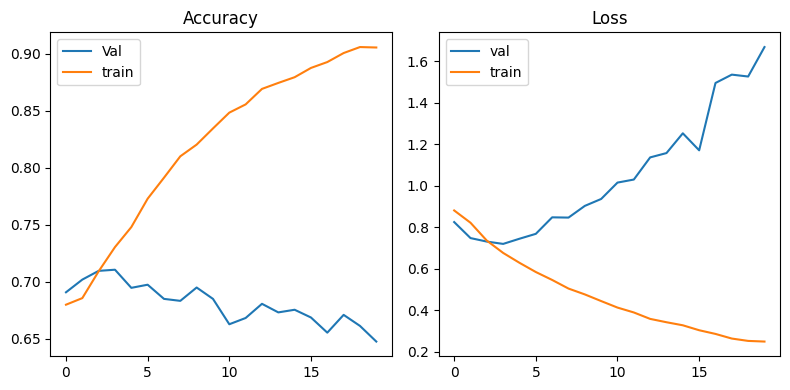

In [ ]:
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
train_loss = history.history['loss']
epochs = list(range(0, len(val_acc)))

fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].set_title('Accuracy')
axes[0].plot(epochs, val_acc, label='Val')
axes[0].plot(epochs, train_acc, label='train')
axes[0].legend()

axes[1].set_title('Loss')
axes[1].plot(epochs, val_loss, label='val')
axes[1].plot(epochs, train_loss, label='train')
axes[1].legend()

plt.tight_layout()
plt.show()

### С лемматизацией

In [ ]:
max_length = 50
max_tokens = 10_000

text_vectorization = layers.TextVectorization(
 max_tokens=max_tokens,
 output_mode="int",
 output_sequence_length=max_length,
)

text_vectorization.adapt(df_train['clean_text_with_lemm'])

X_train = text_vectorization(df_train['clean_text_with_lemm'])
X_val   = text_vectorization(df_val['clean_text_with_lemm'])
X_test  = text_vectorization(df_test['clean_text_with_lemm'])

y_train = df_train['reviews.rating'].values
y_val = df_val['reviews.rating'].values
y_test = df_test['reviews.rating'].values

In [ ]:
model_with_lemm = keras.Sequential([
    layers.Input(shape=(max_length,)),
    layers.Embedding(input_dim=max_tokens, output_dim=64),
    layers.LSTM(64),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

callbacks = [keras.callbacks.ModelCheckpoint('amazon_lstm_with_lemm.keras', monitor='val_loss', save_best_only=True)]
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=callbacks, validation_data=(X_val, y_val))


Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6585 - loss: 0.9871 - val_accuracy: 0.6901 - val_loss: 0.8175
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6897 - loss: 0.8035 - val_accuracy: 0.7076 - val_loss: 0.7366
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7356 - loss: 0.6710 - val_accuracy: 0.7122 - val_loss: 0.7379
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7764 - loss: 0.5752 - val_accuracy: 0.7012 - val_loss: 0.8124
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8099 - loss: 0.4870 - val_accuracy: 0.6699 - val_loss: 0.8508
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8416 - loss: 0.4120 - val_accuracy: 0.6823 - val_loss: 0.9157
Epoch 7/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8595 - loss: 0.3676 - val_accuracy: 0.6810 - val_loss: 1.0806
Epoch 8/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8720 - loss: 0.3374 - val_accuracy: 0

In [ ]:
model_with_lemm_best = keras.models.load_model('amazon_lstm_with_lemm.keras')
test_loss, test_acc = model_best.evaluate(X_test, y_test)
(test_loss, test_acc)

217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6394 - loss: 0.9568


(0.9534632563591003, 0.6414958238601685)

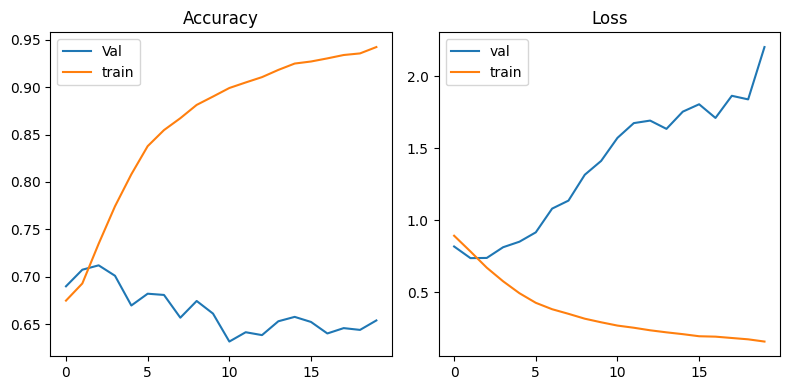

In [ ]:
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
train_loss = history.history['loss']
epochs = list(range(0, len(val_acc)))

fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].set_title('Accuracy')
axes[0].plot(epochs, val_acc, label='Val')
axes[0].plot(epochs, train_acc, label='train')
axes[0].legend()

axes[1].set_title('Loss')
axes[1].plot(epochs, val_loss, label='val')
axes[1].plot(epochs, train_loss, label='train')
axes[1].legend()

plt.tight_layout()
plt.show()

### Сравнение

| Подход                  | Test accuracy | Test loss |
|-------------------------|---------------|-----------|
| lstm no lemmatization   | 0.7139        | 0.7211    |
| lstm with lemmatization | 0.6415        | 0.9534    |